# Imports

In [9]:
import os

import numpy as np
import matplotlib.pyplot as plt

# Getting Data


In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")



In [46]:
import struct

def load_mnist_ubyte(path, kind='train'):
    """
    Loads MNIST data from ubyte files.
    'kind' specifies 'train' or 't10k' (test) data.
    """

    # 1. Define file names based on the 'kind' argument
    image_file = os.path.join(path, kind + '-images.idx3-ubyte')
    label_file = os.path.join(path, kind + '-labels.idx1-ubyte')

    # 2. Load the labels
    with open(label_file, 'rb') as lbpath:
        # Read the magic number (4 bytes) and number of items (4 bytes)
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    # 3. Load the images and reshape
    with open(image_file, 'rb') as imgpath:
        magic, num_images, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), cols*rows)



    return images, labels

## Data examples

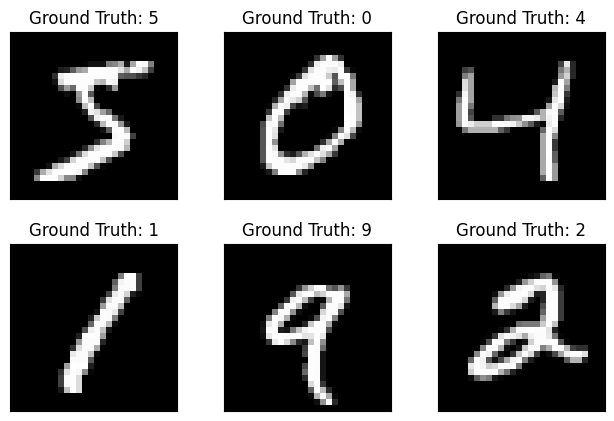

In [98]:
x_train, y_train = load_mnist_ubyte(path, kind='train')
x_test, y_test = load_mnist_ubyte(path, kind='t10k')

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(x_train[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(f"Ground Truth: {y_train[i]}")
    plt.xticks([])
    plt.yticks([])



## Data distribution

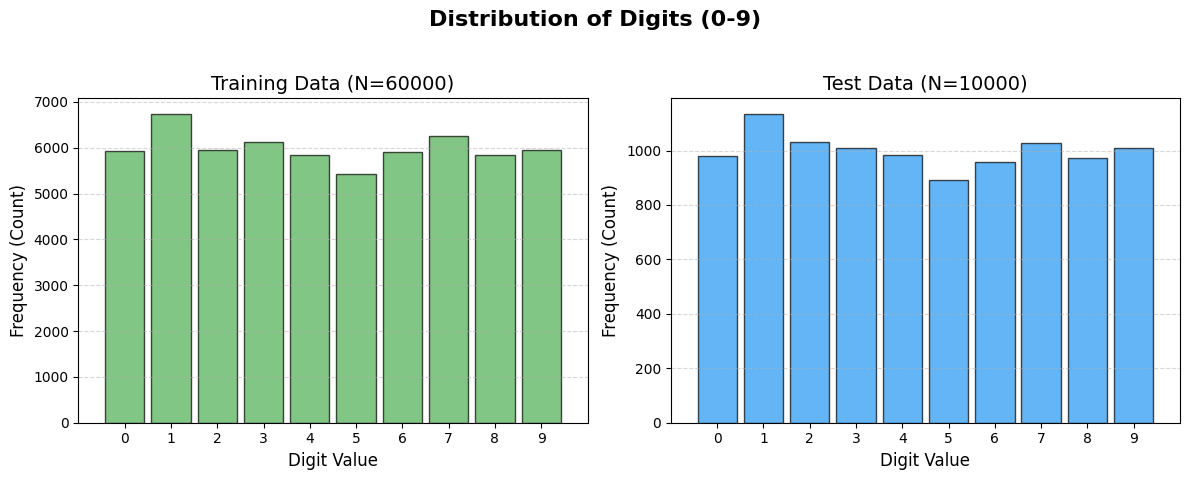

In [100]:
from utils.plot_functions import  plot_digit_histograms

plot_digit_histograms(y_train, y_test)

# Machine Learning Models
On flatten raw data


## Imports


In [57]:
import cv2


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

## Result Analysis Function

In [89]:
def metrics(Y_hat, Y):
    cm = confusion_matrix(Y_hat, Y)
    cr = classification_report(Y, Y_hat)


    fig, (ax_report, ax_matrix) = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('Model Evaluation Metrics', fontsize=16)


    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax_matrix,cmap='hot')
    ax_matrix.set_title('Confusion Matrix')

    ax_report.text(
        x=0.05,
        y=0.95,
        s=cr,
        family='monospace',
        fontsize=16,
        verticalalignment='top',
        transform=ax_report.transAxes)
    ax_report.set_title('Classification Report')
    ax_report.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


## Linear Discriminant Analysis (LDA)


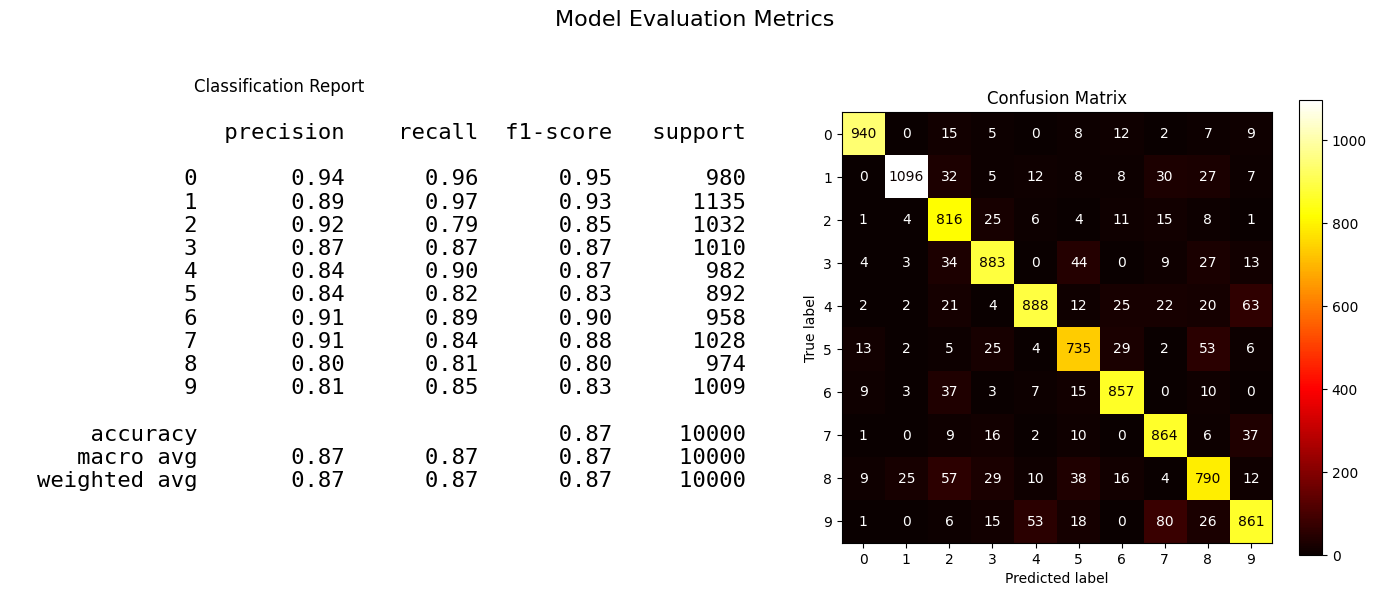

None


In [107]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

lda_pred = lda.predict(x_test)

print(metrics(lda_pred, y_test))

## Logistic Regression


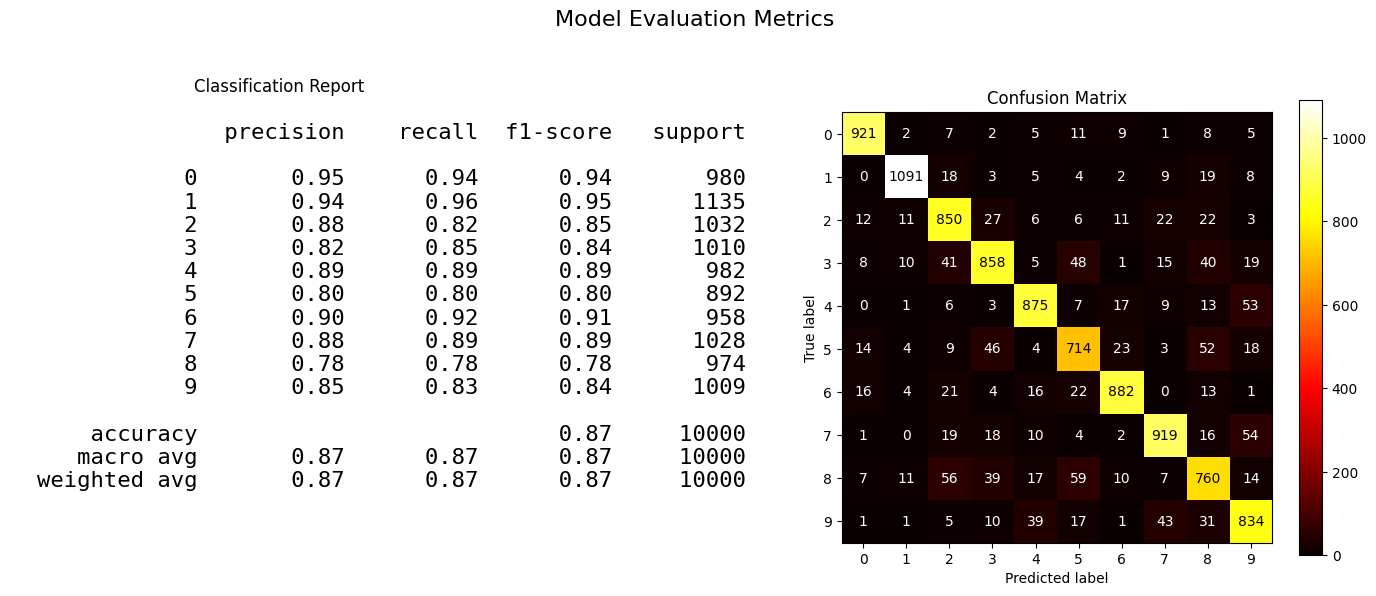

None


In [109]:
logistic = LogisticRegression(max_iter=10000)

logistic.fit(x_train[:10000], y_train[:10000]) #10k is planty for Logistic Regression
logi_pred = logistic.predict(x_test)

print(metrics(logi_pred, y_test))

## K-neareast neigbours (KNN)

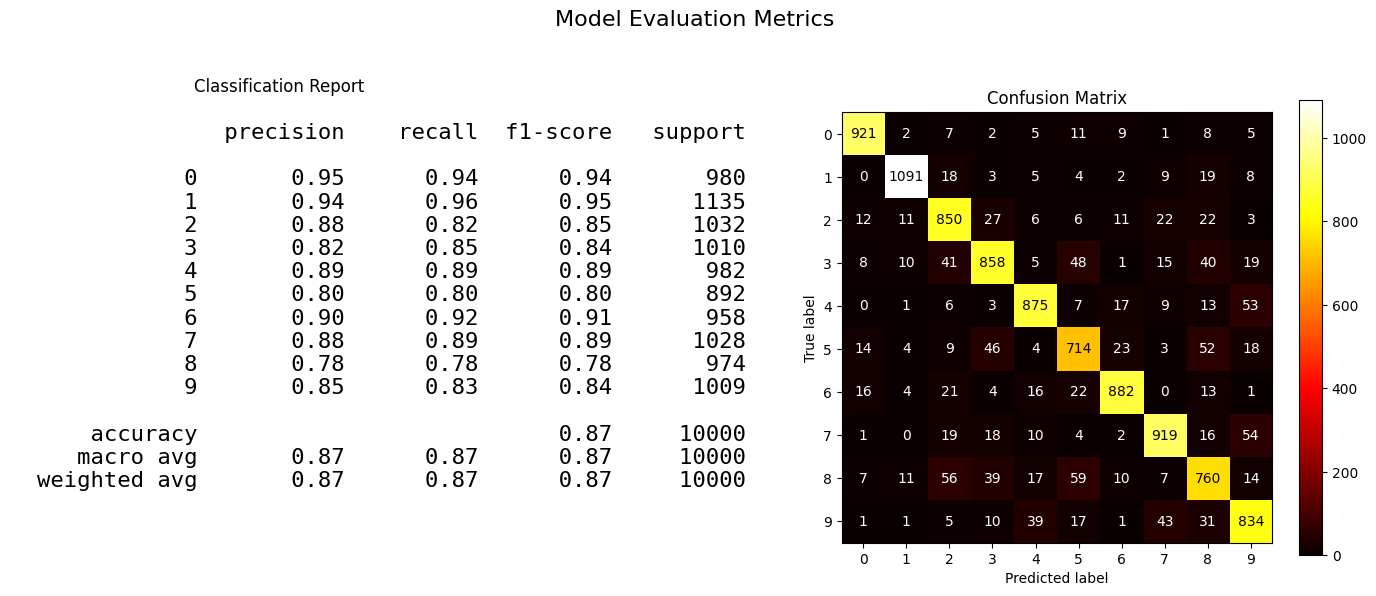

None


In [105]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = logistic.predict(x_test)

print(metrics(knn_pred, y_test))

## Summary
As we can see each model gets 0.87 accuracy. Similar scores form different methods proves that further parameters optimization is pointless.

# ML models with Histogram of Oriented Gradients (HOG)
